# FordGoBike Service Analysis 
## by Chuhang Chen

## Investigation Overview

> In this investigation, I wanted to look at the characteristics of the usage and customer base of the FordGoBike bike-sharing service. The main focus was on When are most trips taken in terms of time of day, day of the week base on the user types.


## Dataset Overview

> There are 2.3 million bike sharing records in this dataset. The main features are duration, start time, and user types. Other features like start and end station location and customer information like gender and birth year are also included. A tiny part of the records are removed due to uncertainty of the validaty of these records.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
dtypes = {'bike_id': int, 'end_time': str, 'start_time': str}
parse_dates = ['end_time', 'start_time']
bike_share = pd.read_csv('bike_share.csv', dtype = dtypes, parse_dates=parse_dates)

In [3]:
# data wrangling and remove non-valid records
bike_share = bike_share.drop('bike_share_for_all_trip', axis =1)
bike_share.loc[:,'weekday'] = bike_share.loc[:,'start_time'].dt.weekday
bike_share.loc[:,'month'] = bike_share.loc[:,'start_time'].dt.month
bike_share.loc[:,'hour'] = bike_share.loc[:,'start_time'].dt.hour
bike_share['year'] = bike_share['start_time'].dt.year
bike_2018 = bike_share[bike_share['year'] == 2018].copy()
bike_share = bike_share[(bike_share['start_station_latitude'] < 38) & (bike_share['start_station_longitude'] < -120)]
bike_share['user_type'] = bike_share['user_type'].astype('category')

## Distribution of Trips 

The number of trips taken along the time varies a lot. From the introduced of this service, about 0.5k trips were taken per week, to nearly 50k trips were taken around August, 2018.

Also, from the distribution, we can see there are four big jumps on trips number around end of November and December in bot 2017 and 2018. These jumps should be from the Thanksgiving and Christmas Holiday. 


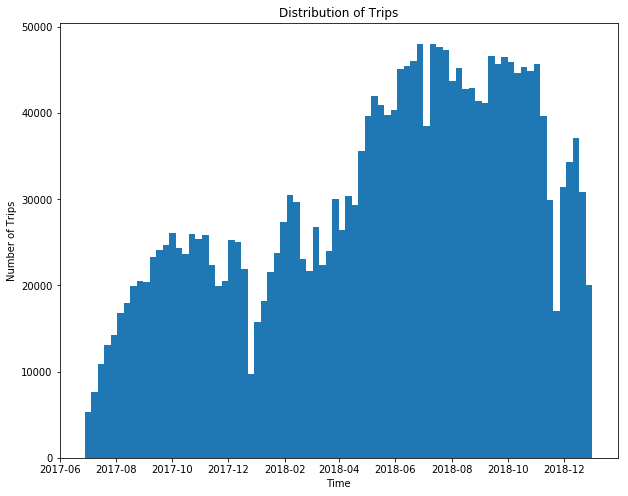

In [4]:
# plot the distribution for activities counts on time series
plt.figure(figsize=[10, 8])
plt.hist(data = bike_share, x = 'start_time', bins = 78)
plt.title('Distribution of Trips')
plt.xlabel('Time')
plt.ylabel('Number of Trips')

plt.show()


## Distribution of Duration of Trips

The duration of trips in the dataset take on a very large range of values, from 60 second to 80k seconds(22 hours). Plotted on a logarithmic scale, the distribution of duration takes on a normal distribution

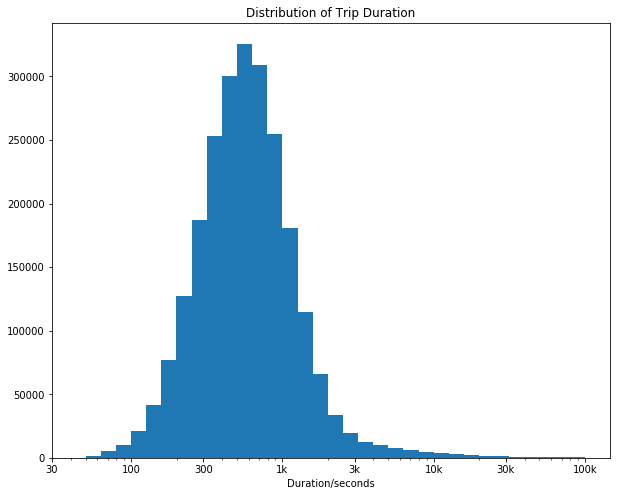

In [5]:
log_binsize = 0.1
bins = 10 ** np.arange(1.7, np.log10(bike_share['duration_sec'].max())+log_binsize, log_binsize)
plt.figure(figsize=[10, 8])
plt.hist(data = bike_share, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5], [30, 100, 300, '1k', '3k', '10k', '30k', '100k'])
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration/seconds')

plt.show()

## Number of Trips taken in terms of Month, Day of Week, Hour
People use this service most during summer times, weekdays, rush hour

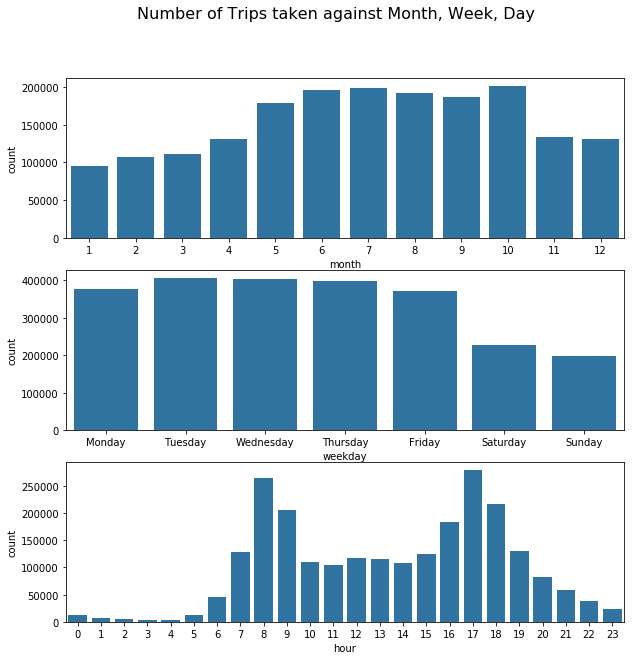

In [6]:
base_color = sb.color_palette()[0]

fig, ax = plt.subplots(nrows = 3, figsize = [10,10])

sb.countplot(data = bike_2018, x = 'month', color = base_color, ax = ax[0]);
fig.suptitle('Number of Trips taken against Month, Week, Day', fontsize=16)

sb.countplot(data = bike_share, x = 'weekday', color = base_color, ax = ax[1]);
ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', \
                                        'Thursday', 'Friday','Saturday', 'Sunday' ])

sb.countplot(data = bike_share, x = 'hour', color = base_color, ax = ax[2]);

## Average Duration vs. Day of the Week
## Number of Trips vs. Day of the Week
Plot the comparison of duration time and number of trips against day of the week. 
The number of rides in weekdays is much higher than that in weekends. Nevertheless, the duration average is much higher during weekends. That's may come from different use of this service for weekdays or weekens 



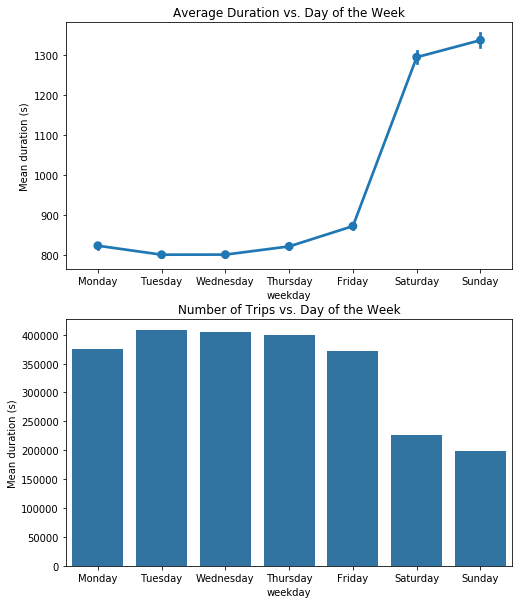

In [7]:

fig, ax = plt.subplots(nrows = 2, figsize = [8,10])
sb.pointplot(data = bike_share, x = 'weekday', y = 'duration_sec', ax = ax[0]);
ax[0].set_ylabel('Mean duration (s)')
ax[0].set_title('Average Duration vs. Day of the Week')
ax[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', \
                                        'Thursday', 'Friday','Saturday', 'Sunday'])
sb.countplot(data = bike_share, x = 'weekday', color = base_color, ax = ax[1]);
ax[1].set_ylabel('Mean duration (s)')
ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', \
                                        'Thursday', 'Friday','Saturday', 'Sunday' ])
ax[1].set_title('Number of Trips vs. Day of the Week');

## Average Duration vs. Hour of a Day
## Number of Trips vs. Hour of a Day
For the hour plots, the comparision for average duration and counts share the similar pattern with day in a week. When counts get high, the duration becomes short.

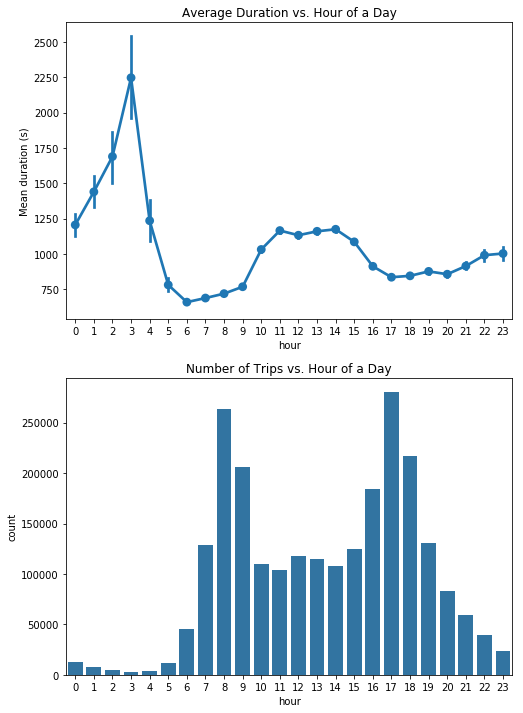

In [8]:
# plot the line plot and bar chart for average duration vs. weekday, counts for hour
fig, ax = plt.subplots(nrows = 2, figsize = [8,12])
sb.pointplot(data = bike_share, x = 'hour', y = 'duration_sec', ax = ax[0]);
ax[0].set_ylabel('Mean duration (s)')
ax[0].set_title('Average Duration vs. Hour of a Day')

sb.countplot(data = bike_share, x = 'hour', color = base_color, ax = ax[1]);
ax[1].set_title('Number of Trips vs. Hour of a Day');

## Average Duration VS. Month, Day, Hour
From the figures above, we can see that the usage time for non-members are much higher than that of members. Also, the usage time for non-member users changes more dramatically according to time, date.

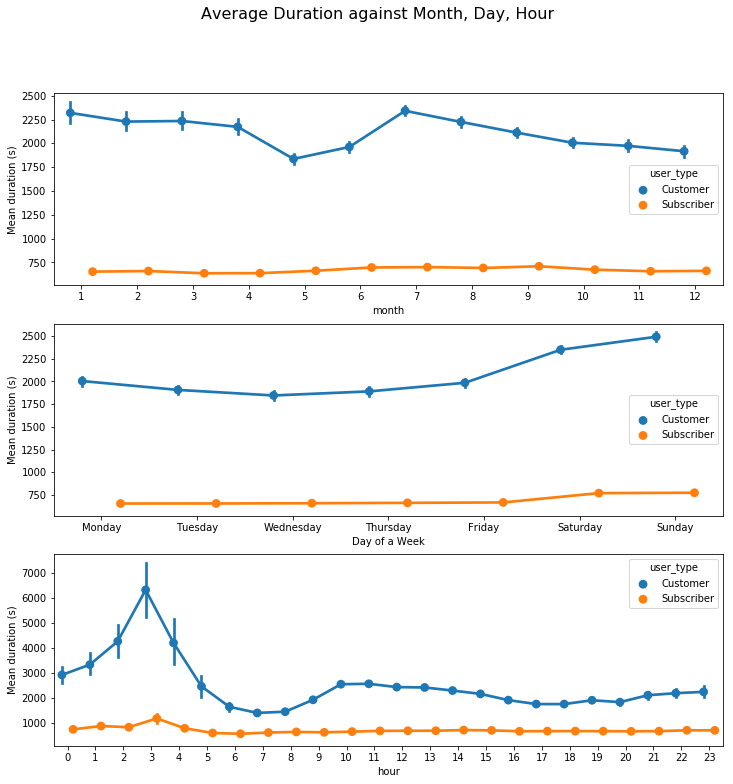

In [9]:
#plot the point plots for mean duration agains hour, weekday, month, 
#with user_type variable added
fig, ax = plt.subplots(nrows = 3, figsize = [12,12])
fig.suptitle('Average Duration against Month, Day, Hour', fontsize=16)
sb.pointplot(data = bike_share, x = 'month', y = 'duration_sec', hue = 'user_type',\
             dodge = 0.4, ax = ax[0])
ax[0].set_title('')
ax[0].set_ylabel('Mean duration (s)')


sb.pointplot(data = bike_share, x = 'weekday', y = 'duration_sec', hue = 'user_type',\
             dodge = 0.4, ax = ax[1])
ax[1].set_title('')
ax[1].set_ylabel('Mean duration (s)')
ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', \
                                        'Thursday', 'Friday','Saturday', 'Sunday' ])
ax[1].set_xlabel('Day of a Week')

sb.pointplot(data = bike_share, x = 'hour', y = 'duration_sec', hue = 'user_type',\
             dodge = 0.4, ax = ax[2])
ax[2].set_title('')
ax[2].set_ylabel('Mean duration (s)')

plt.show();

## Number of Trips VS. Month, Day, Hour
The difference in number of trips between member and non-member users in weekdays are much larger than weekends. 
Also, for each hour of a day, the difference in number of trips between member and non-member during the rush hours are much larger than other time. Meanwhile, members are use the service during rush hour, non-member use it more during 10am to 4pm. 

People will prefer have membership if they use the service regularly and for commute.


Text(0,0.5,'Number of Trips')

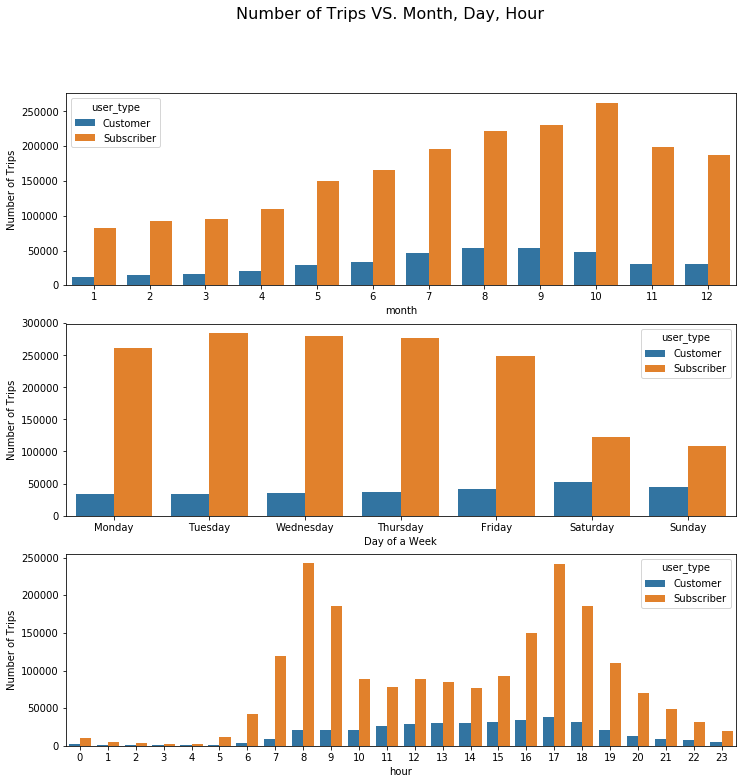

In [10]:
fig, ax = plt.subplots(nrows = 3, figsize = [12,12])
fig.suptitle('Number of Trips VS. Month, Day, Hour', fontsize=16)

# subplot 1: weekday vs user type
sb.countplot(data = bike_share, x = 'month', hue = 'user_type', ax = ax[0])
ax[0].set_ylabel('Number of Trips')
# subplot 2: month vs user type(data for year 2018 is used)

sb.countplot(data = bike_2018, x = 'weekday', hue = 'user_type', ax = ax[1])
ax[1].set_ylabel('Number of Trips')
ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', \
                                        'Thursday', 'Friday','Saturday', 'Sunday' ])
ax[1].set_xlabel('Day of a Week')
#subplot 3: hour vs user type

sb.countplot(data = bike_share, x = 'hour', hue = 'user_type', ax = ax[2])
ax[2].set_ylabel('Number of Trips')